# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("D:\STUDY\Hackathon\PROJECT\LessDataset_new.csv")

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8000.000000,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.00000,8000.0
mean,23.439500,3.897573e+05,1.043742e+06,7.446258e+05,8.221317e+05,1.091790e+06,0.25000,0.0
std,44.240928,1.176715e+06,2.265642e+06,2.023053e+06,2.459461e+06,2.885304e+06,0.43304,0.0
min,1.000000,3.750000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
25%,1.000000,5.205722e+03,5.561000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
50%,3.000000,2.911796e+04,5.021750e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
75%,6.000000,2.227650e+05,6.688382e+05,7.315911e+04,2.766343e+05,4.242505e+05,0.25000,0.0
max,177.000000,1.000000e+07,3.767004e+07,2.767004e+07,3.296166e+07,3.464570e+07,1.00000,0.0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'],axis=1,inplace=True)

In [7]:
copy = df.copy()

copy.drop(['isFraud'],axis=1,inplace=True)

In [8]:
df["type"].unique()

array(['TRANSFER', 'CASH_OUT', 'PAYMENT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])

map_type = dict(zip(le.classes_, le.transform(le.classes_)))

type_mapping = pd.DataFrame.from_dict(data=map_type, orient='index')

type_mapping

,0
CASH_IN,0
CASH_OUT,1
DEBIT,2
PAYMENT,3
TRANSFER,4


In [10]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,4,181.0,181.0,0.0,0.0,0.0,1
1,1,181.0,181.0,0.0,21182.0,0.0,1
2,4,2806.0,2806.0,0.0,0.0,0.0,1
3,1,2806.0,2806.0,0.0,26202.0,0.0,1
4,4,20128.0,20128.0,0.0,0.0,0.0,1


Text(0.5, 1.0, 'Correlation Heatmap')

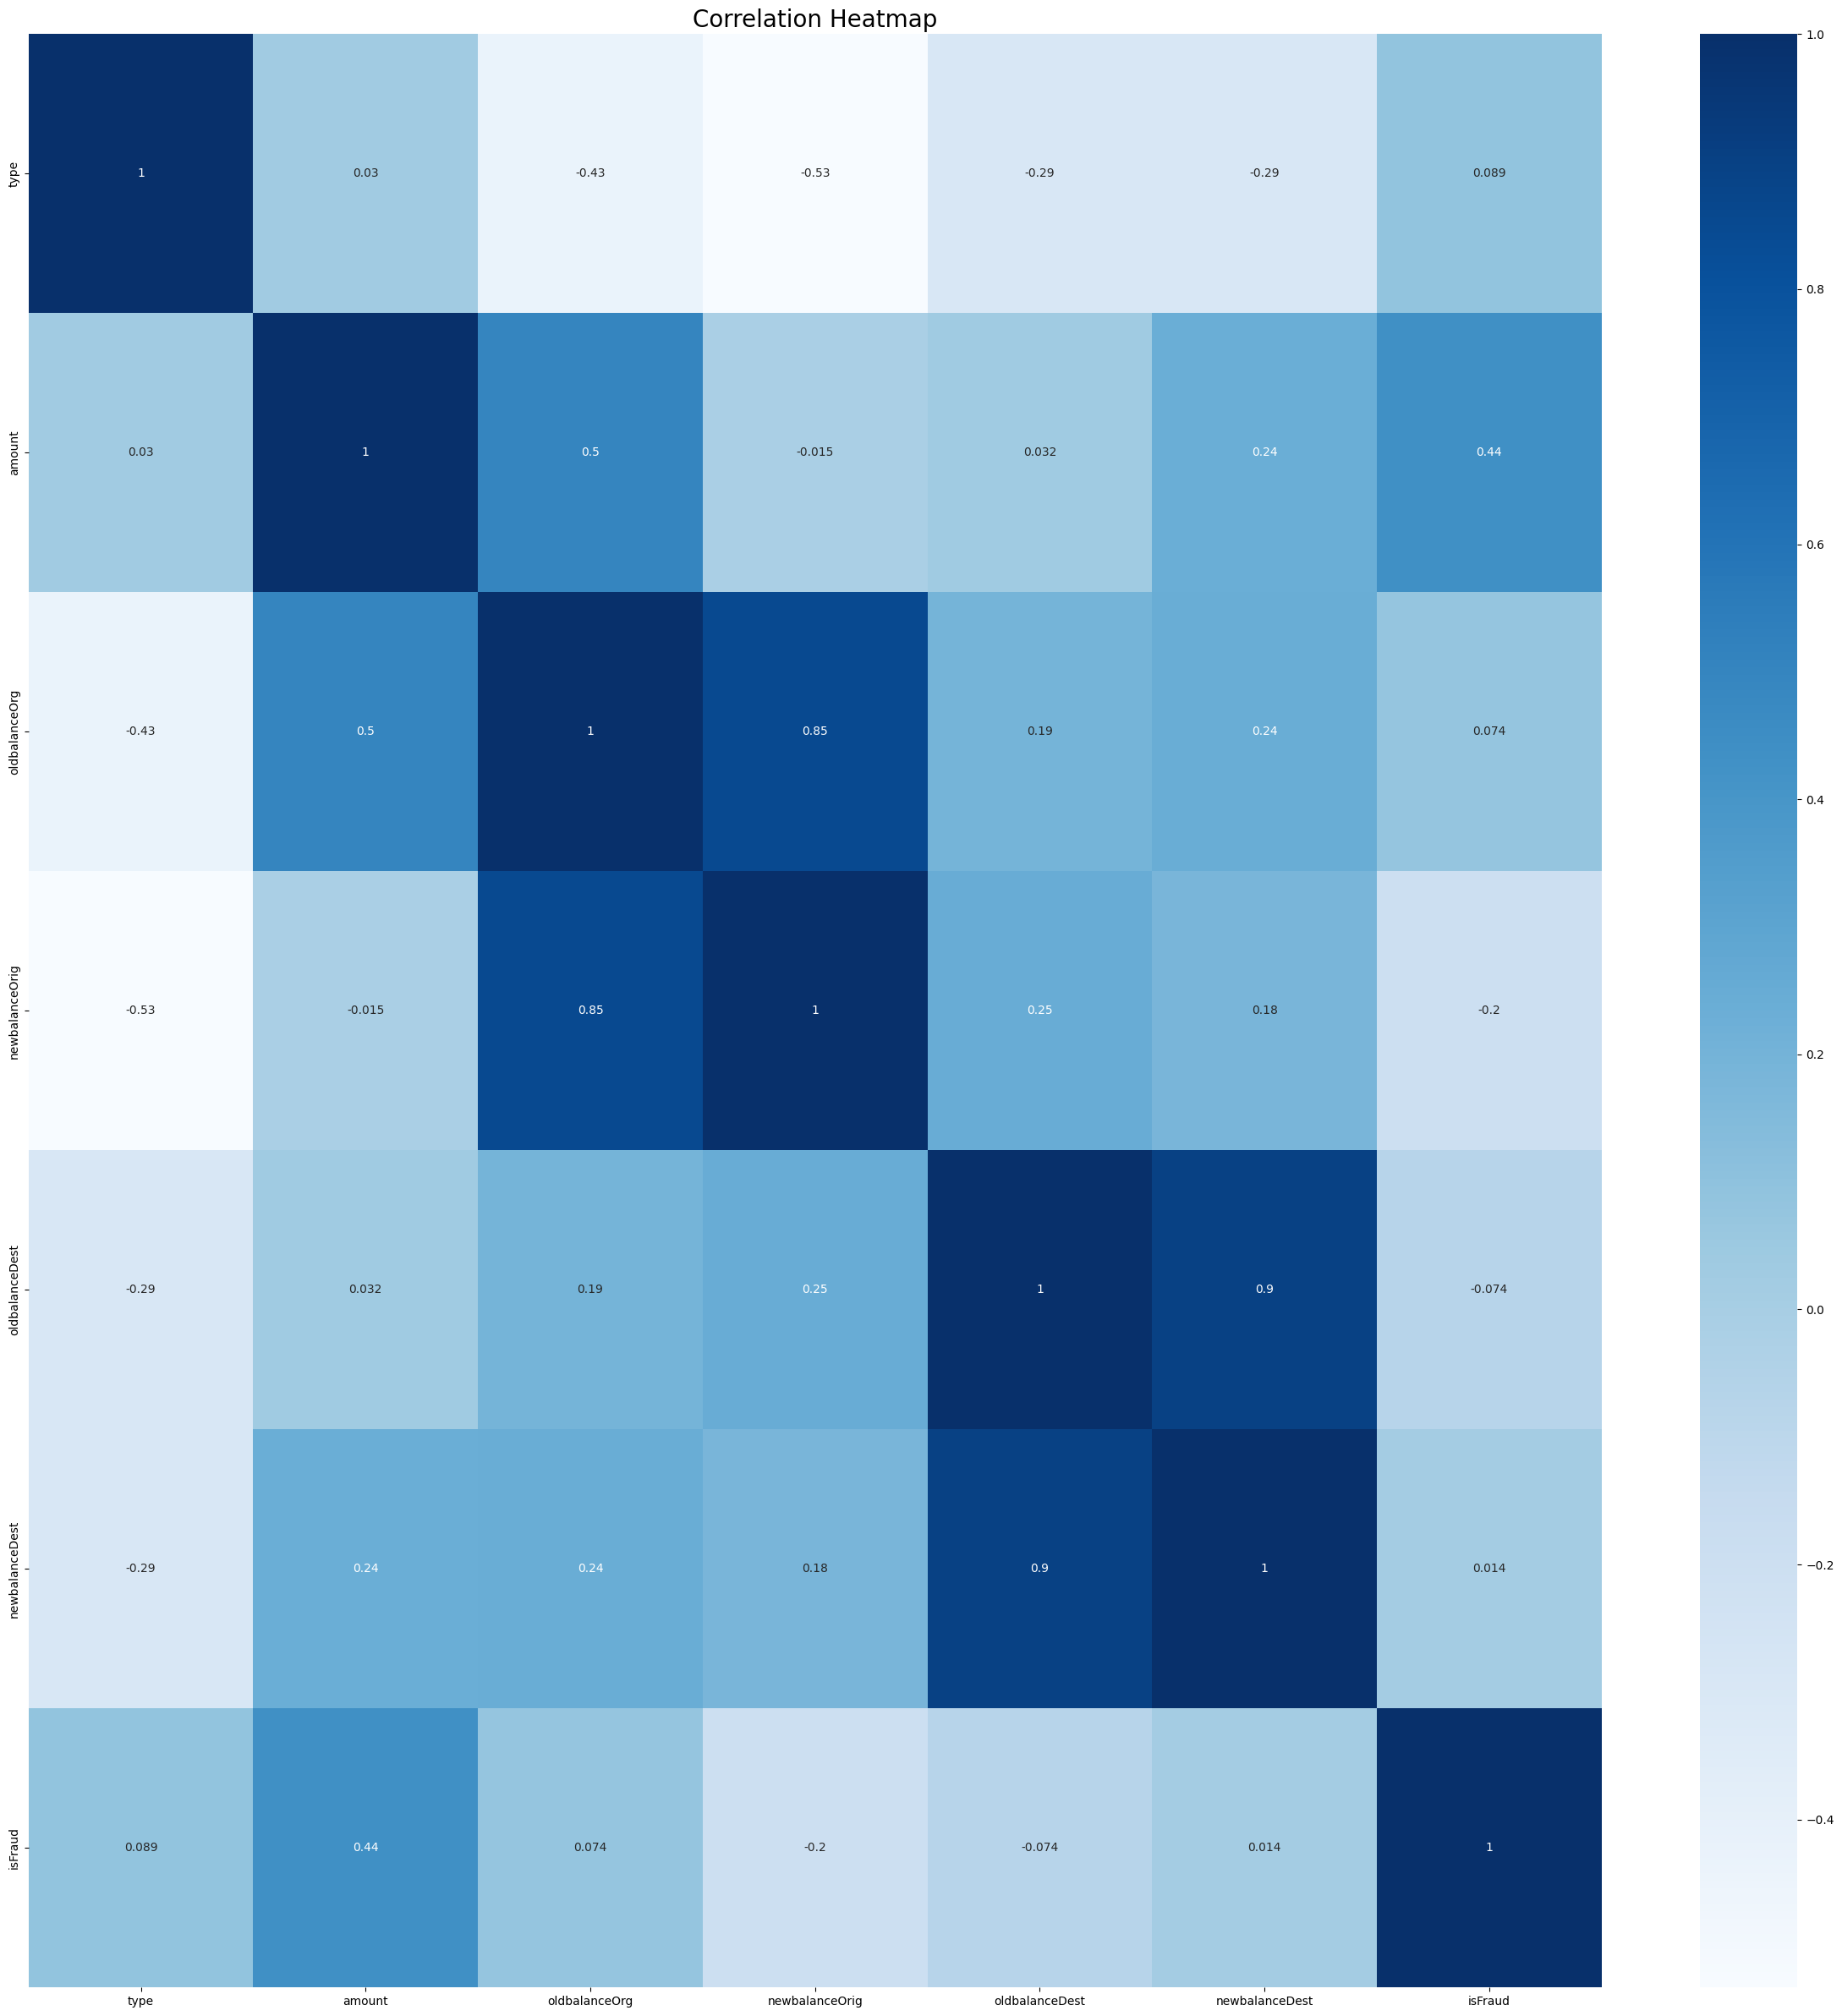

In [11]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=20)

In [108]:
#Target = df.iloc[:,-1]

#print("Before Sampling")
#Target.value_counts()

#under_sampler = RandomUnderSampler(sampling_strategy={1:1000, 0:65})

#df_sampled, Y_sampled = under_sampler.fit_resample(copy, Target)

#df_sampled.head()

In [12]:
col = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [13]:
f = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

In [14]:
scaler = StandardScaler()
standard_features = scaler.fit_transform(f)
standard_features = pd.DataFrame(standard_features, columns =col)
standard_features.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.331092,-0.460632,-0.368093,-0.334294,-0.37842
1,-0.331092,-0.460632,-0.368093,-0.325681,-0.37842
2,-0.328861,-0.459473,-0.368093,-0.334294,-0.37842
3,-0.328861,-0.459473,-0.368093,-0.323640,-0.37842
4,-0.314139,-0.451827,-0.368093,-0.334294,-0.37842


In [15]:
final_df = standard_features.copy()

final_df['type'] = df['type']
final_df['isFraud'] = df['isFraud']

final_df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,isFraud
0,-0.331092,-0.460632,-0.368093,-0.334294,-0.37842,4,1
1,-0.331092,-0.460632,-0.368093,-0.325681,-0.37842,1,1
2,-0.328861,-0.459473,-0.368093,-0.334294,-0.37842,4,1
3,-0.328861,-0.459473,-0.368093,-0.323640,-0.37842,1,1
4,-0.314139,-0.451827,-0.368093,-0.334294,-0.37842,4,1


In [16]:
#final_df.to_csv('D:\STUDY\Hackathon\PROJECT\Final_Dataset.csv', index=False)

In [17]:
type_mapping.to_csv('D:\STUDY\Hackathon\PROJECT\Rajasthan_hackathon\Type_LabelMapping.csv')

In [18]:
import joblib 

joblib.dump(scaler, 'D:\STUDY\Hackathon\PROJECT\Rajasthan_hackathon\StandardScaler.pkl')

['D:\\STUDY\\Hackathon\\PROJECT\\Rajasthan_hackathon\\StandardScaler.pkl']